# SGD Regression

Our second model is Stochastic Gradient Descent (SGD) Regression. We will explore the implementation of the SGD regression model to analyze and predict text toxicity. 

SGD is a linear model optimization algorithm that updates model parameters incrementally for each training sample. It is computationally efficient and well-suited for large-scale problems and linear relationships.

Our Objectives for this modeling:

Utilize a Bag of Words approach to preprocess text data.

Identify and interpret significant terms contributing to various toxicity categories.

Evaluate model performance and visualize results to understand key insights.

First, we will import libraries and read in datesets.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import gensim
import string
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read the training and testing datasets
train_path = "../data/data-clean/cleaned_train.csv"
test_path = "../data/data-clean/all_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Toxicity

First, we will detect the overall toxicity.

We will performs preprocessing, feature extraction, and hyperparameter tuning for the SGD model to predict the toxicity. This part will involve data splitting, text vectorization, and systematic experimentation with hyperparameters to find the optimal model.


In [3]:
feature = train_df[['comment_text']]
output = train_df[['target']] 
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)

# Bag of Word

Here we will use Bag of Words to transform text data into numerical features. Terms contributing to toxicity predictions are ranked based on their weights in the model.

In [4]:
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [5]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['target'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['target'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.021291098954342454
Mean Squared Error on cv set:  0.0239894539673811
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.020694583769152262
Mean Squared Error on cv set:  0.024059830644376442
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.023941914317342865
Mean Squared Error on cv set:  0.024199854217921885
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.02020321435376152
Mean Squared Error on cv set:  0.023837055672526215
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.029100091254319487
Mean Squared Error on cv set:  0.027831332872518152
**************************************************
0.001 l2 :


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.020908971007612614
Mean Squared Error on cv set:  0.024136692479984564
**************************************************
0.01 l1 :
Mean Squared Error on train set:  0.034376109721829494
Mean Squared Error on cv set:  0.0326424714541707
**************************************************
0.01 l2 :
Mean Squared Error on train set:  0.022824932784714216
Mean Squared Error on cv set:  0.02499996870747778
**************************************************
0.1 l1 :
Mean Squared Error on train set:  0.034445718524076574
Mean Squared Error on cv set:  0.03266105341569738
**************************************************
0.1 l2 :
Mean Squared Error on train set:  0.029662391772593756
Mean Squared Error on cv set:  0.02910832095525187
**************************************************
1 l1 :
Mean Squared Error on train set:  0.03444170395885492
Mean Squared Error on cv set:  0.032657176155898276
**************************************************
1 l2 :
Mean S

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.03444328242776767
Mean Squared Error on cv set:  0.03265870061919709
**************************************************
10 l2 :
Mean Squared Error on train set:  0.03416260799762977
Mean Squared Error on cv set:  0.032426305051242006
**************************************************
100 l1 :
Mean Squared Error on train set:  0.03444975643595091
Mean Squared Error on cv set:  0.03266495338493888
**************************************************
100 l2 :
Mean Squared Error on train set:  0.03444079592928587
Mean Squared Error on cv set:  0.03265849211252956
**************************************************


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# Best models parameters:
best_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [7]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
stupid,0.265155
idiot,0.176829
crap,0.111319
fuck,0.097678
ridicul,0.092936
ignor,0.087462
fool,0.080717
damn,0.079256
shit,0.078086
dumb,0.076294


In [8]:
test_preds = best_model.predict(bow_test)

In [9]:
test_df['predicted_target'] = test_preds

# obscene

We will perform the identical procedure to predict toxicity for the "obscene" sub-category. 

In [10]:
feature = train_df[['comment_text']]
output = train_df[['obscene']] 

In [11]:
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [12]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['obscene'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['obscene'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.004059830796658194
Mean Squared Error on cv set:  0.0036939541547010217
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.0038864009216132553
Mean Squared Error on cv set:  0.003697212957857905
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.0045570778798976665
Mean Squared Error on cv set:  0.0037502794200135157
**************************************************
0.0001 l2 :


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.003888343435529875
Mean Squared Error on cv set:  0.003702585632339531
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.005387115895854346
Mean Squared Error on cv set:  0.0043804528973555934
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.0039293019108579234
Mean Squared Error on cv set:  0.003723019647307452
**************************************************
0.01 l1 :
Mean Squared Error on train set:  0.005514680845071804
Mean Squared Error on cv set:  0.004492890845327783
**************************************************
0.01 l2 :
Mean Squared Error on train set:  0.0042147895861091985
Mean Squared Error on cv set:  0.0038370282387681066
**************************************************
0.1 l1 :


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.005514480537044053
Mean Squared Error on cv set:  0.004492743072333819
**************************************************
0.1 l2 :
Mean Squared Error on train set:  0.005113409601673147
Mean Squared Error on cv set:  0.004268333185694359
**************************************************
1 l1 :
Mean Squared Error on train set:  0.005514837197747532
Mean Squared Error on cv set:  0.004493006259989499
**************************************************
1 l2 :
Mean Squared Error on train set:  0.005450316786342653
Mean Squared Error on cv set:  0.004447151148432186
**************************************************
10 l1 :
Mean Squared Error on train set:  0.005514629453409872
Mean Squared Error on cv set:  0.004492852922760677
**************************************************
10 l2 :
Mean Squared Error on train set:  0.005505763059900622
Mean Squared Error on cv set:  0.0044864882707346485
**************************************************
100 l1 :
Mea

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [13]:
# Best models parameters:
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [14]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
fuck,0.081463
damn,0.067140
shit,0.066667
crap,0.066079
ass,0.047696
stupid,0.044209
idiot,0.040936
suck,0.027003
darn,0.018355
pussi,0.016164


In [15]:
test_preds = best_model.predict(bow_test)
test_df['predicted_obscene'] = test_preds

# identity_attack

We will perform the identical procedure to predict toxicity for the "identity_attack" sub-category. 

In [16]:
feature = train_df[['comment_text']]
output = train_df[['identity_attack']]

In [17]:
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [18]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['identity_attack'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['identity_attack'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.003226931753725009
Mean Squared Error on cv set:  0.003728513729675756
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.003050139554127281
Mean Squared Error on cv set:  0.0037657543097382156
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.0036882324559933117
Mean Squared Error on cv set:  0.0036914021243552087
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.003043918901843383
Mean Squared Error on cv set:  0.0037551532872336915
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.004210544658413056
Mean Squared Error on cv set:  0.004049856272904117
**************************************************
0.001 l2 :


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.0030755882495710333
Mean Squared Error on cv set:  0.003743266226028852
**************************************************
0.01 l1 :
Mean Squared Error on train set:  0.004980382898709864
Mean Squared Error on cv set:  0.004608963945805361
**************************************************
0.01 l2 :
Mean Squared Error on train set:  0.0032557181679124404
Mean Squared Error on cv set:  0.0037532774984060913
**************************************************
0.1 l1 :
Mean Squared Error on train set:  0.0049802621858311405
Mean Squared Error on cv set:  0.004608871080504046
**************************************************
0.1 l2 :
Mean Squared Error on train set:  0.004085659378498678
Mean Squared Error on cv set:  0.004085721506188555
**************************************************
1 l1 :
Mean Squared Error on train set:  0.004979896774405434
Mean Squared Error on cv set:  0.0046085900977501796
**************************************************
1 

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.004949834590161501
Mean Squared Error on cv set:  0.004591643670852822
**************************************************
100 l1 :
Mean Squared Error on train set:  0.0049800502823511665
Mean Squared Error on cv set:  0.004608708113505743
**************************************************
100 l2 :
Mean Squared Error on train set:  0.004977340426345113
Mean Squared Error on cv set:  0.004607152979264649
**************************************************


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Best models parameters:
best_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]
test_preds = best_model.predict(bow_test)
test_df['predicted_identity_attack'] = test_preds

In [21]:
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
white,0.075883
gay,0.065001
black,0.045662
racist,0.039191
muslim,0.029916
christian,0.028572
homosexu,0.024988
women,0.019554
religion,0.019553
church,0.019257


# insult

We will perform the identical procedure to predict toxicity for the "insult" sub-category. 

In [22]:
feature = train_df[['comment_text']]
output = train_df[['insult']] 
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [23]:
# Performing hyperparameter tuning:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['insult'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['insult'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.015771444539913918
Mean Squared Error on cv set:  0.017609225371253947
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.015263218936189888
Mean Squared Error on cv set:  0.01761721803078053
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.017854981857626115
Mean Squared Error on cv set:  0.01780165855900366
**************************************************
0.0001 l2 :


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.01523608279795524
Mean Squared Error on cv set:  0.017617599435115587
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.021869102730337583
Mean Squared Error on cv set:  0.02071347713180609
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.015423882465494067
Mean Squared Error on cv set:  0.01768211390105545
**************************************************
0.01 l1 :
Mean Squared Error on train set:  0.02605395357776291
Mean Squared Error on cv set:  0.024531320618146345
**************************************************
0.01 l2 :
Mean Squared Error on train set:  0.016971904383520354
Mean Squared Error on cv set:  0.018457968961631925
**************************************************
0.1 l1 :
Mean Squared Error on train set:  0.02598221832396723
Mean Squared Error on cv set:  0.0244566633639084
**************************************************
0.1 l2 :

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.025981502332937466
Mean Squared Error on cv set:  0.024455945637390775
**************************************************
1 l2 :
Mean Squared Error on train set:  0.02544048793357392
Mean Squared Error on cv set:  0.024024426149853128
**************************************************
10 l1 :
Mean Squared Error on train set:  0.025983579795026288
Mean Squared Error on cv set:  0.024458028133337775
**************************************************
10 l2 :
Mean Squared Error on train set:  0.02591587592771137
Mean Squared Error on cv set:  0.02440380056633922
**************************************************
100 l1 :
Mean Squared Error on train set:  0.02598167669592412
Mean Squared Error on cv set:  0.024456120423071815
**************************************************
100 l2 :
Mean Squared Error on train set:  0.025993660354600087
Mean Squared Error on cv set:  0.024469143505151378
**************************************************


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [24]:
# Best models parameters:
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [25]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
stupid,0.251590
idiot,0.168079
ridicul,0.091382
ignor,0.088476
crap,0.076592
dumb,0.075386
fool,0.074700
fuck,0.068671
troll,0.066238
hypocrit,0.063485


In [26]:
test_preds = best_model.predict(bow_test)
test_df['predicted_insult'] = test_preds

# threat

We will perform the identical procedure to predict toxicity for the "threat" sub-category. 

In [27]:
feature = train_df[['comment_text']]
output = train_df[['threat']] 
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=6000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [28]:
# Performing hyperparameter tuning:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['threat'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['threat'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.0019094997187633171
Mean Squared Error on cv set:  0.00227823446556542
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.0018547824305165485
Mean Squared Error on cv set:  0.002294418896796826
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.002058115492802095
Mean Squared Error on cv set:  0.002284802250155308
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.0018560897674933605
Mean Squared Error on cv set:  0.0022945113498305733
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.0021680392510461015
Mean Squared Error on cv set:  0.0023857905296091773
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.001863341088839867
Mean Squared Error on cv set:  0.0022969204971124775
*****************************

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.0022776826714234768
Mean Squared Error on cv set:  0.0025214434190870276
**************************************************
10 l2 :
Mean Squared Error on train set:  0.0022753561299256766
Mean Squared Error on cv set:  0.002519760014954692
**************************************************
100 l1 :
Mean Squared Error on train set:  0.0022777802178991207
Mean Squared Error on cv set:  0.0025215548368503708
**************************************************
100 l2 :
Mean Squared Error on train set:  0.0022744230578096852
Mean Squared Error on cv set:  0.002518410196299987
**************************************************


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Best models parameters:
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
kill,0.034995
shoot,0.031654
murder,0.021284
shot,0.018540
death,0.016625
arm,0.012253
dead,0.011744
hang,0.009522
die,0.008963
bear,0.008926


In [31]:
test_preds = best_model.predict(bow_test)
test_df['predicted_threat'] = test_preds
test_df.to_csv('../data/data-predict/SGDRegressor_test_predictions.csv', index=False)

# Toxicity EDA

Getting all the results, we will perform some post modeling exploratory analysis. 

We will create various plots to visualize the statistics of detected toxicity values both within and across categories. Additionally, matrix plots and pair plots will be utilized to explore relationships and correlations between different toxicity categories.

In [32]:
print(test_df['predicted_target'].describe())

count    342.000000
mean       0.067103
std        0.063517
min       -0.019977
25%        0.031607
50%        0.052247
75%        0.078934
max        0.478678
Name: predicted_target, dtype: float64


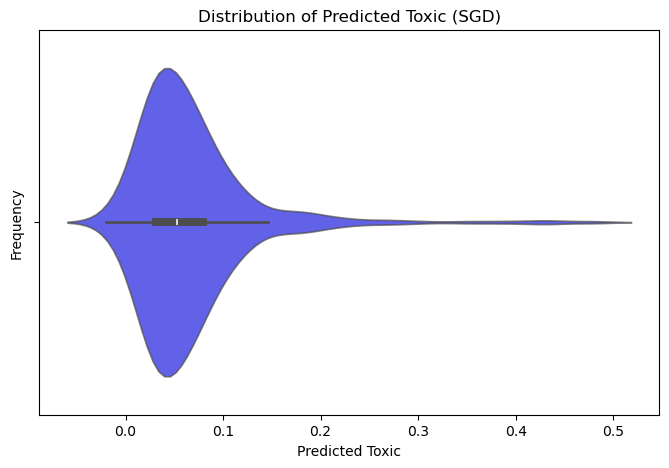

In [33]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_target'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Toxic (SGD)")
plt.xlabel("Predicted Toxic")
plt.ylabel("Frequency")
plt.show()

In [34]:
top_predictions = test_df.sort_values(by='predicted_target', ascending=False).head(10)
print(top_predictions[['text', 'predicted_target']])

low_predictions = test_df.sort_values(by='predicted_target', ascending=True).head(10)
print(low_predictions[['text', 'predicted_target']])

                                                  text  predicted_target
45   liron peopl qrting like dunk peopl dislik ai a...          0.478678
206  contentcatapult runwayml udiomus midjourney do...          0.436685
0    thefrogsoupram bluerei naegiko didnt consent a...          0.424765
251  bletzevan ottomoth sillymizu naegiko noth scar...          0.388610
106  week late discours think hirohiko araki statem...          0.350398
120  monachikosx charismaticgeto alreadi put place ...          0.299279
187  mizosi kjburbankva nah dont give keep fight bs...          0.268110
18   everyon support ai look good monster planet fu...          0.263335
236  ai creator lie shit fuck ugliest soulless bull...          0.230408
84   cocacola ai your kill creativ brown tornado do...          0.224344
                                                  text  predicted_target
42   yle saturday novemb also featur perspect resea...         -0.019977
224  widen use ai think may reach point human made 

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.5  # Adjusted threshold

# Select high toxicity comments
high_toxic_comments = test_df[test_df['predicted_target'] > high_toxic_threshold]['text'].values
high_toxic_text = " ".join(high_toxic_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_toxic_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_toxic_text)
else:
    print("No high toxic comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_toxic_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Toxic Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()


No high toxic comments available for word cloud!


<Figure size 1600x800 with 0 Axes>

## obscene

In [36]:
print(test_df['predicted_obscene'].describe())

count    342.000000
mean       0.018723
std        0.028438
min       -0.007641
25%        0.005328
50%        0.010622
75%        0.018370
max        0.198449
Name: predicted_obscene, dtype: float64


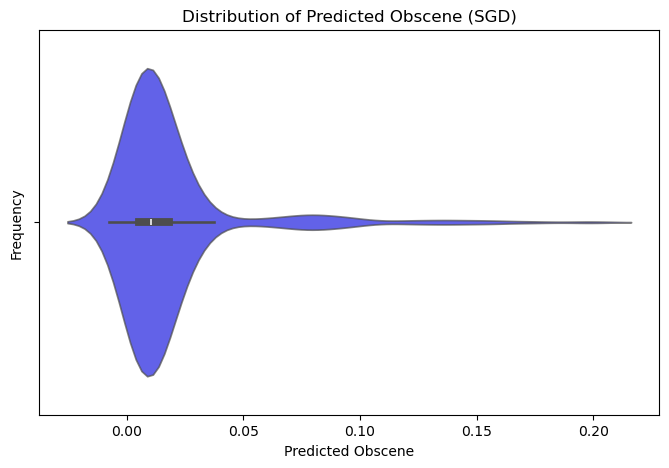

In [37]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_obscene'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Obscene (SGD)")
plt.xlabel("Predicted Obscene")
plt.ylabel("Frequency")
plt.show()

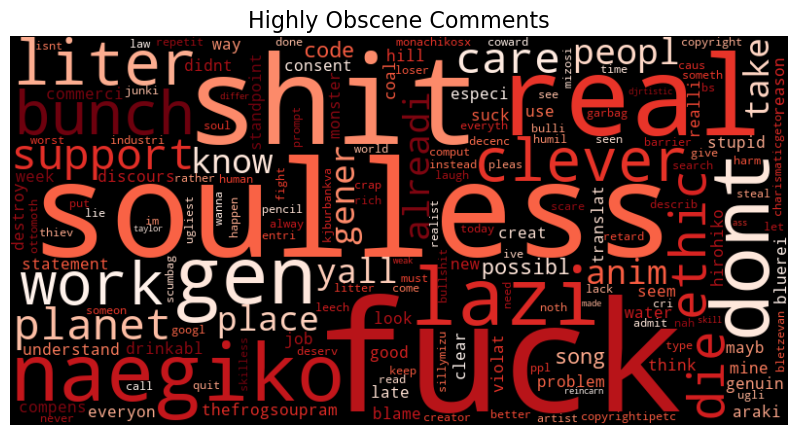

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.1  # Adjusted threshold

# Select high toxicity comments
high_obscene_comments = test_df[test_df['predicted_obscene'] > high_toxic_threshold]['text'].values
high_obscene_text = " ".join(high_obscene_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_obscene_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_obscene_text)
else:
    print("No high obscene comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_obscene_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Obscene Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

## identity_attack

In [39]:
print(test_df['predicted_identity_attack'].describe())

count    342.000000
mean       0.007620
std        0.010359
min       -0.005281
25%        0.003638
50%        0.005129
75%        0.009183
max        0.142287
Name: predicted_identity_attack, dtype: float64


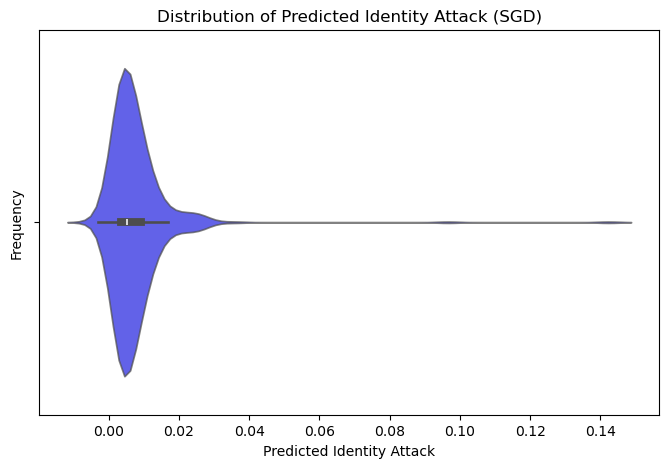

In [40]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_identity_attack'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Identity Attack (SGD)")
plt.xlabel("Predicted Identity Attack")
plt.ylabel("Frequency")
plt.show()

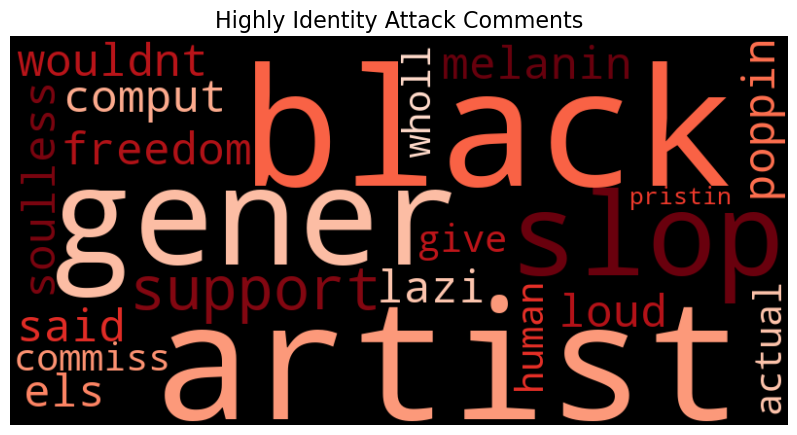

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.1  # Adjusted threshold

# Select high toxicity comments
high_ia_comments = test_df[test_df['predicted_identity_attack'] > high_toxic_threshold]['text'].values
high_ia_text = " ".join(high_ia_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_ia_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_ia_text)
else:
    print("No high identity attack comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_ia_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Identity Attack Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

## insult

In [42]:
print(test_df['predicted_insult'].describe())

count    342.000000
mean       0.047238
std        0.052428
min       -0.022377
25%        0.020648
50%        0.034260
75%        0.057872
max        0.451761
Name: predicted_insult, dtype: float64


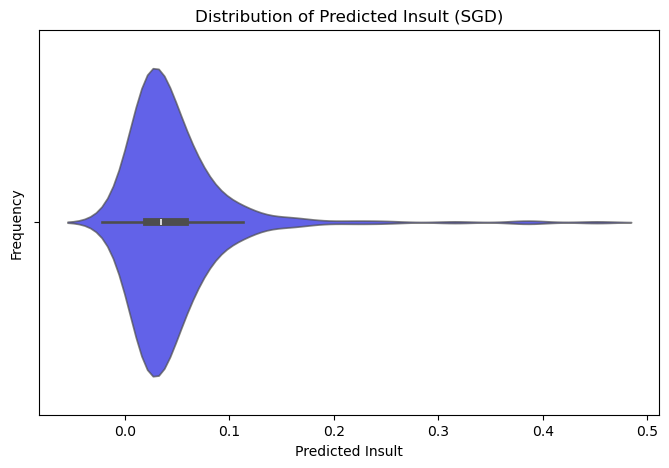

In [43]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_insult'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Insult (SGD)")
plt.xlabel("Predicted Insult")
plt.ylabel("Frequency")
plt.show()

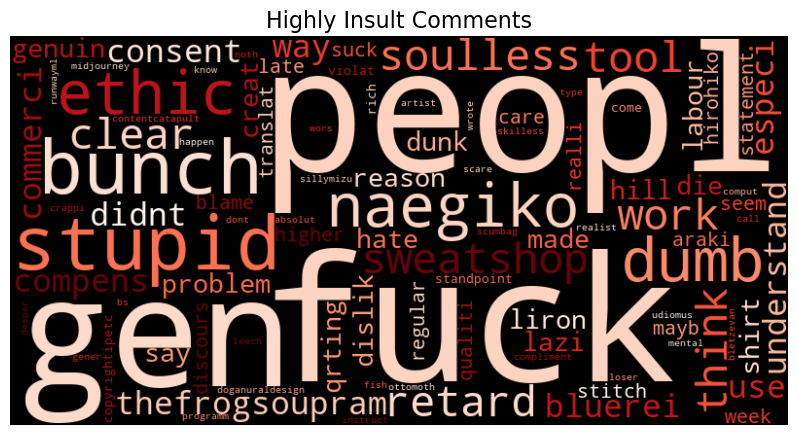

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.25  # Adjusted threshold

# Select high toxicity comments
high_insult_comments = test_df[test_df['predicted_insult'] > high_toxic_threshold]['text'].values
high_insult_text = " ".join(high_insult_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_insult_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_insult_text)
else:
    print("No high insult comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_insult_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Insult Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

# threat

In [45]:
print(test_df['predicted_threat'].describe())

count    342.000000
mean       0.004573
std        0.011291
min       -0.008939
25%       -0.000803
50%        0.002132
75%        0.005697
max        0.074686
Name: predicted_threat, dtype: float64


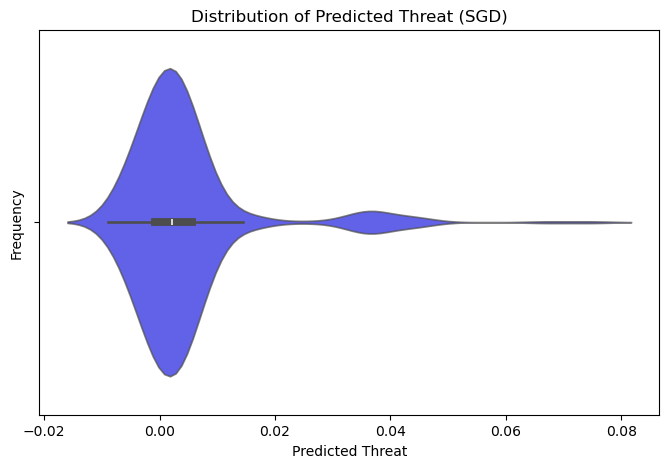

In [46]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_threat'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Threat (SGD)")
plt.xlabel("Predicted Threat")
plt.ylabel("Frequency")
plt.show()

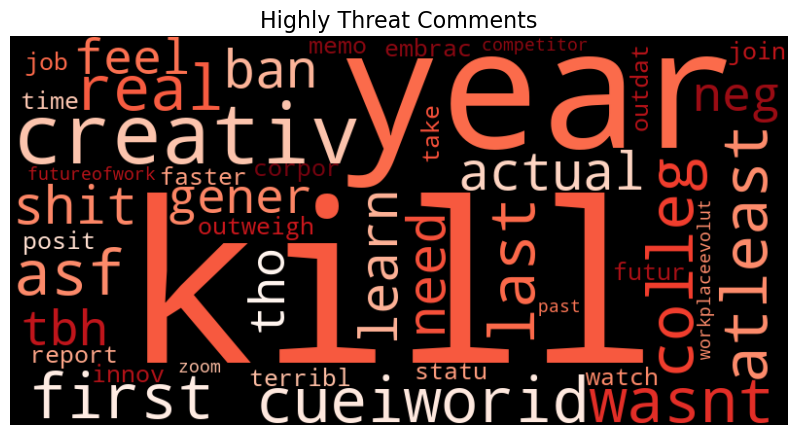

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.05  # Adjusted threshold

# Select high toxicity comments
high_threat_comments = test_df[test_df['predicted_threat'] > high_toxic_threshold]['text'].values
high_threat_text = " ".join(high_threat_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_threat_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_threat_text)
else:
    print("No high threat comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_threat_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Threat Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

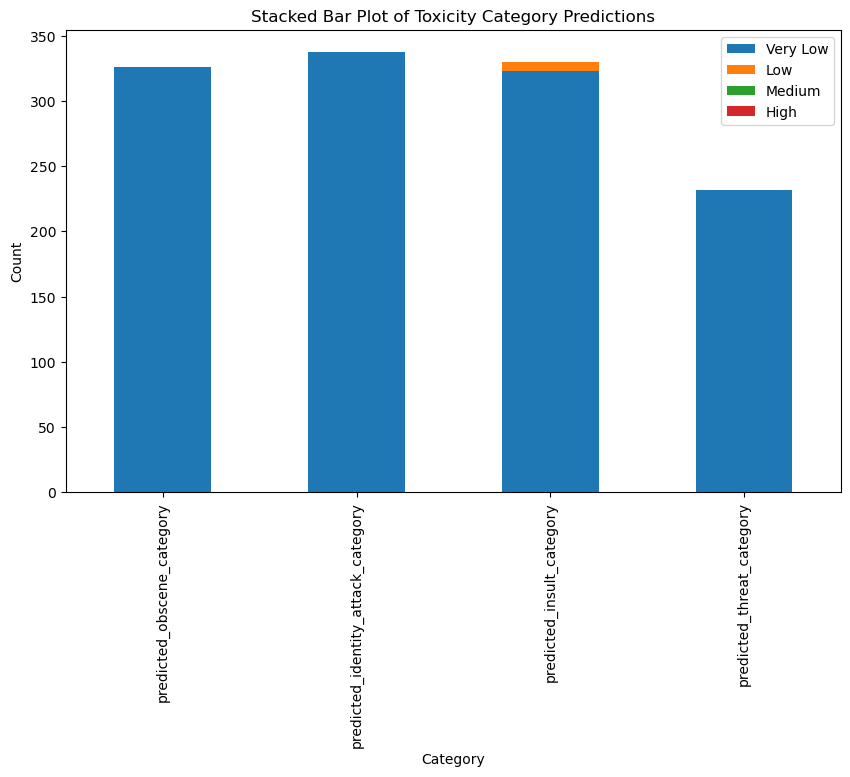

In [48]:
toxic_categories = ['predicted_obscene', 'predicted_identity_attack', 'predicted_insult', 'predicted_threat']

bins = [0, 0.2, 0.5, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High']

for cat in toxic_categories:
    test_df[f'{cat}_category'] = pd.cut(test_df[cat], bins=bins, labels=labels)

category_columns = [f'{cat}_category' for cat in toxic_categories]
test_df[category_columns].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Toxicity Category Predictions')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

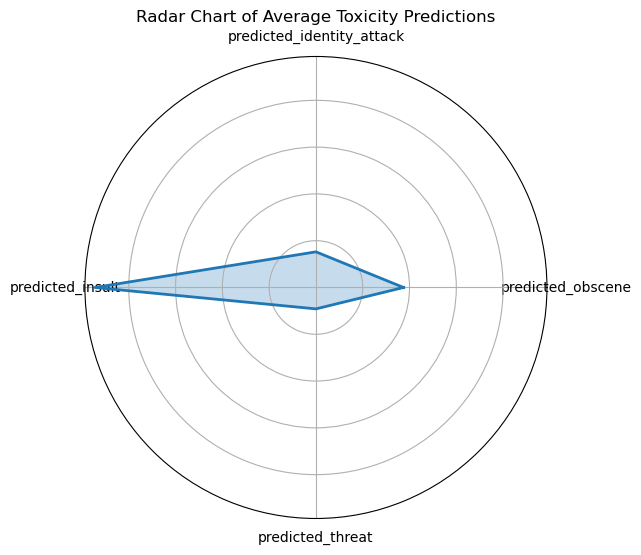

In [49]:
mean_values = test_df[toxic_categories].mean()

labels = toxic_categories
values = mean_values.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

values = np.concatenate((values, [values[0]]))  
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, alpha=0.25)
ax.plot(angles, values, linewidth=2)
ax.set_yticklabels([])  

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Radar Chart of Average Toxicity Predictions')
plt.show()

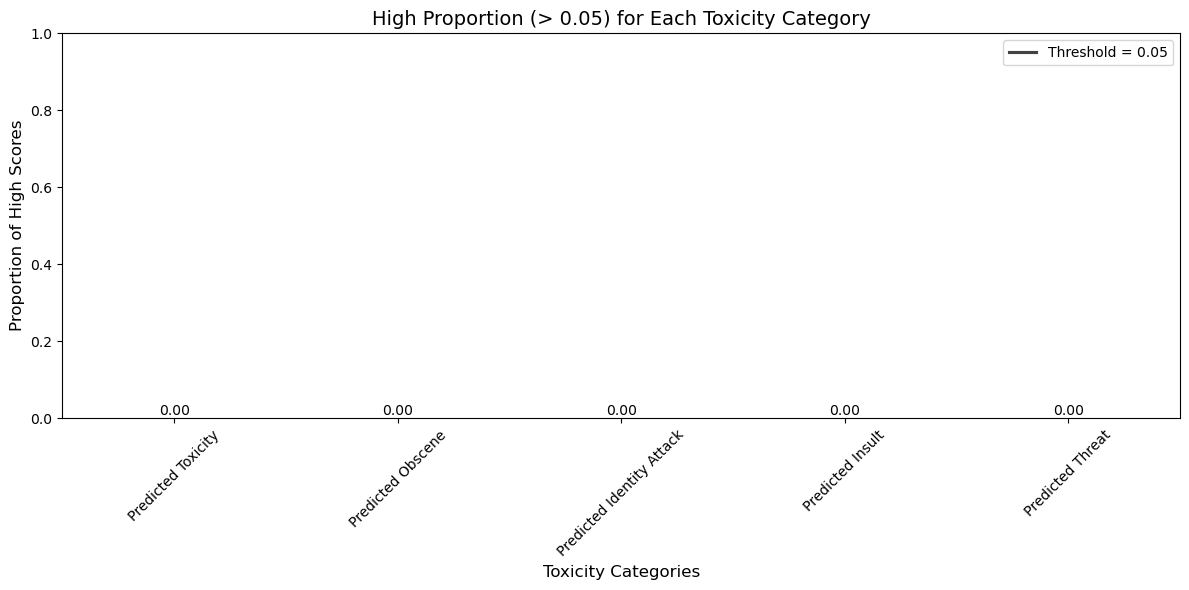

In [37]:
# Define the threshold
threshold = 0.5

# Toxic categories to analyze
toxic_categories = {
    'predicted_target': 'Predicted Toxicity',
    'predicted_obscene': 'Predicted Obscene',
    'predicted_identity_attack': 'Predicted Identity Attack',
    'predicted_insult': 'Predicted Insult',
    'predicted_threat': 'Predicted Threat'
}

# Calculate the high proportion for each category
high_proportions = {}
for category, label in toxic_categories.items():
    high_proportions[label] = (test_df[category] > threshold).mean()

# Convert to a sorted list for visualization
high_proportions_sorted = dict(sorted(high_proportions.items(), key=lambda x: x[1], reverse=True))

# Plot the high proportions
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=list(high_proportions_sorted.keys()),
    y=list(high_proportions_sorted.values()),
    palette='coolwarm'
)

# Add titles and labels
plt.title("High Proportion (> 0.05) for Each Toxicity Category", fontsize=14)
plt.ylabel("Proportion of High Scores", fontsize=12)
plt.xlabel("Toxicity Categories", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add bar labels to show values
for bar in bars.patches:
    value = bar.get_height()
    bars.annotate(f"{value:.2f}", (bar.get_x() + bar.get_width() / 2, value), 
                  ha='center', va='bottom', fontsize=10, color='black')

# Add legend
plt.legend(["Threshold = 0.05"], loc='upper right', fontsize=10, frameon=True)

# Show plot
plt.tight_layout()
plt.show()

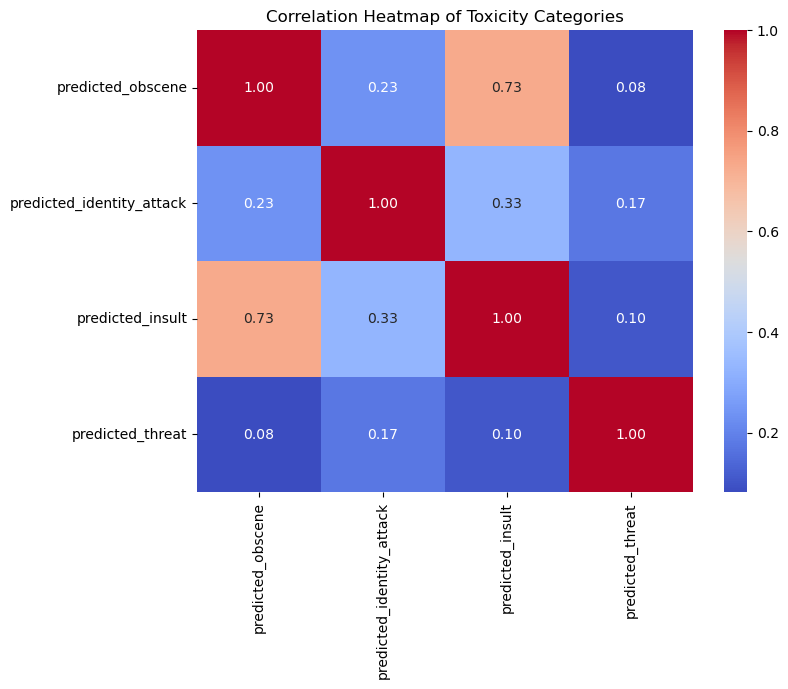

In [51]:
toxic_categories = ['predicted_obscene', 'predicted_identity_attack', 'predicted_insult', 'predicted_threat']

correlation_matrix = test_df[toxic_categories].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Toxicity Categories')
plt.show()

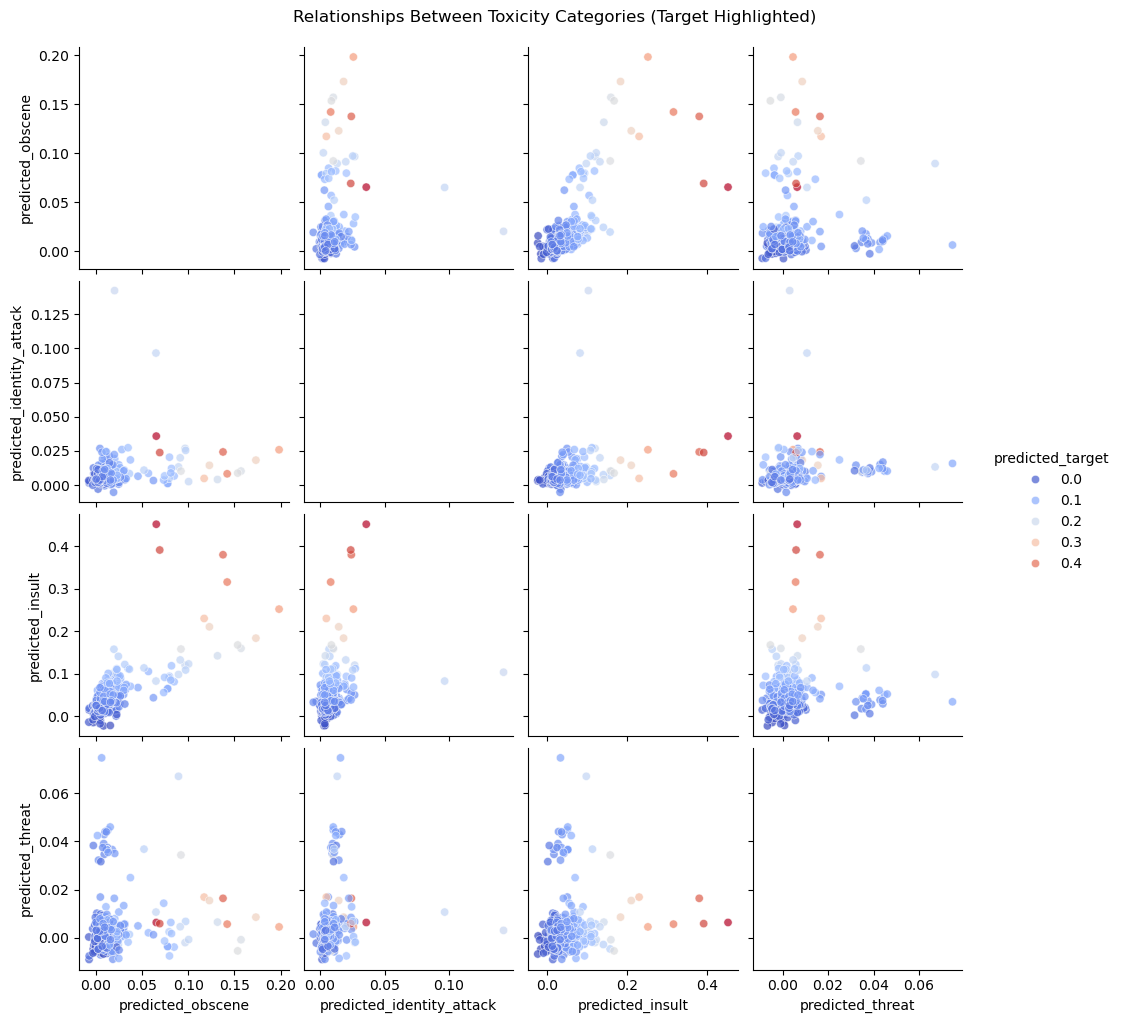

In [52]:
sns.pairplot(data=test_df, vars=toxic_categories, diag_kind='kde',
             hue='predicted_target', palette='coolwarm', plot_kws={'alpha': 0.7})
plt.suptitle("Relationships Between Toxicity Categories (Target Highlighted)", y=1.02)
plt.show()

# Summary

Through our analysis, we can gain below knowledge of the prediction rsults:

Toxicity has the widest range, from -0.018829 to 0.477470. This suggests there are instances in the dataset where the toxicity level can fluctuate greatly, possibly indicating both very non-toxic and highly toxic content.

The Obscene, Identity Attack, Insult, and Threat categories all have narrower ranges, implying that these categories have less variability in terms of predicted values (between 0 and 1), or the model is more consistent in predicting these categories across different instances.

Toxicity has a mean of 0.065519, which is the highest of all categories. This suggests that, on average, the text samples in the dataset have a mild level of toxicity overall.

The Obscene category has the smallest mean (0.018723), indicating that, in general, obscene content is relatively rare or less pronounced in test the dataset.

Threat has the smallest average mean value (0.004573), implying that threatening content is very rare in the dataset.

The Toxicity category shows a higher standard deviation (0.063688), meaning that the model's predictions for toxicity are more spread out around the mean. This could indicate that there is a broader spectrum of toxicity present in the dataset, ranging from low to high levels.

Obscene has a lower standard deviation (0.028438), which means the predictions are more tightly clustered around the mean.

Threat has the highest standard deviation relative to its mean (0.011291), suggesting that even though threatening content is rare, it varies quite a bit when it does occur.

The Toxicity category has the highest MSE (0.0238370), meaning the model's predictions for this category are relatively less accurate. This is likely because the toxicity levels in the data are more spread out, which makes it harder for the model to predict with high accuracy.

Threat has the lowest MSE (0.002278), which could indicate that, although the model predicts a very low level of threat on average, when it does predict a threat, the predictions are relatively accurate.

Obscene and Identity Attack have similar MSE values, but these are relatively low, indicating that the model is reasonably accurate in predicting obscene or identity attack content, despite its rarity.

Overall, the model shows that it has some difficulties with predicting extreme levels of toxicity, particularly for categories that are less common in the data. Balancing the dataset or using specialized techniques might improve predictions for those less frequent but critical categories.